desc

In [1]:
# Local Imports
import os

In [2]:
# External Imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
import seaborn as sns
import networkx as nx

In [3]:
# Variables
DEBUG = 1

In [4]:
# colors print

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [5]:
# Functions

def get_dataframe(file_path:str, sep=','):
    """
    Return a DataFrame's pandas object from a path
    
    Args:
        - file_path(str): path of file
        - sep(str): separator of csv
    """
    try:
        return pd.read_csv(file_path, sep=sep, low_memory=False)
    except FileNotFoundError as e:
        print("CSV is not at root of notebook or incorrectly named.")
        print("Check CSV global variables, if it matches your csv file name.")
        raise e
        

def display_network(datasets_names_list:list):
    """
    
    Arg:
         - datasets_names_list(LIST) : strings names of dataframes variables already loads.
    """
    import warnings
    warnings.filterwarnings('ignore')
    
    edges = dict()
    for dataset in datasets_names_list:
        edges[dataset] = (list(eval(dataset).columns))

    G = nx.Graph()
    df_nodes = STR_DATASETS

    for row in df_nodes:
        G.add_node(row)

    edge_labels = dict()
    for source in df_nodes:
        for target in df_nodes:
            value = len(set(edges[source]) & set(edges[target]))
            if source == target:
                value = 0
            else: 
                if list(set(edges[source]) & set(edges[target])):
                    edge_labels[
                        (source, target)
                    ] = '; '.join(map(str, set(edges[source]) & set(edges[target])))
                    G.add_weighted_edges_from([(source, target, value)])
                else: 
                    pass


    plt.figure(figsize=(25,25))
    options = {
        'edge_color': '#FFDEA2',
        'width': 1,
        'with_labels': True,
        'font_size': 20,
        'linewidths':1,
        'alpha':0.9,
        'node_size': 25_000//len(df_nodes),
        'node_color': 'pink'
    }

    pos = nx.kamada_kawai_layout(G, dist=edge_labels)
    nx.draw(G, pos=pos, **options)
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=edge_labels,
        font_color='red',
        font_size=20
    )
    # print(sorted(G.degree, key=lambda x: x[1], reverse=True))
    plt.show()
    
    temp = list()
    commons = dict()
    for a, b in edge_labels.items():
        if set(a) not in temp:
            temp.append(set(a))
            commons[a] = b
    return commons, G

### Getting datasets

In [6]:
# Datasets Names

DICT_NAMES = {
    'customers': 'olist_customers_dataset.csv',
    'geolocation': 'olist_geolocation_dataset.csv',
    'orders': 'olist_orders_dataset.csv',
    'order_items': 'olist_order_items_dataset.csv',
    'order_payments': 'olist_order_payments_dataset.csv',
    'order_reviews': 'olist_order_reviews_dataset.csv',
    'products': 'olist_products_dataset.csv',
    'sellers': 'olist_sellers_dataset.csv',
    'product_category_name_translation': 'product_category_name_translation.csv',
}

In [7]:
# Folder Path
folder_path = os.path.abspath('')

In [8]:
# Dataset Imports

def get_from_dict_names(name):
    """
    """
    global folder_path
    global DICT_NAMES
    return get_dataframe(os.path.join(folder_path, DICT_NAMES[name]))


customers = get_from_dict_names('customers')
geolocation = get_from_dict_names('geolocation')
orders = get_from_dict_names('orders')
order_items = get_from_dict_names('order_items')
order_payments = get_from_dict_names('order_payments')
order_reviews = get_from_dict_names('order_reviews')
products = get_from_dict_names('products')
sellers = get_from_dict_names('sellers')
product_category_name_translation = get_from_dict_names('product_category_name_translation')

In [9]:
### Finding keys of datasets

In [10]:
# List of datasets' names

STR_DATASETS = [
    'customers',
    'geolocation',
    'orders',
    'order_items',
    'order_payments',
    'order_reviews',
    'products',
    'sellers',
    'product_category_name_translation'
]

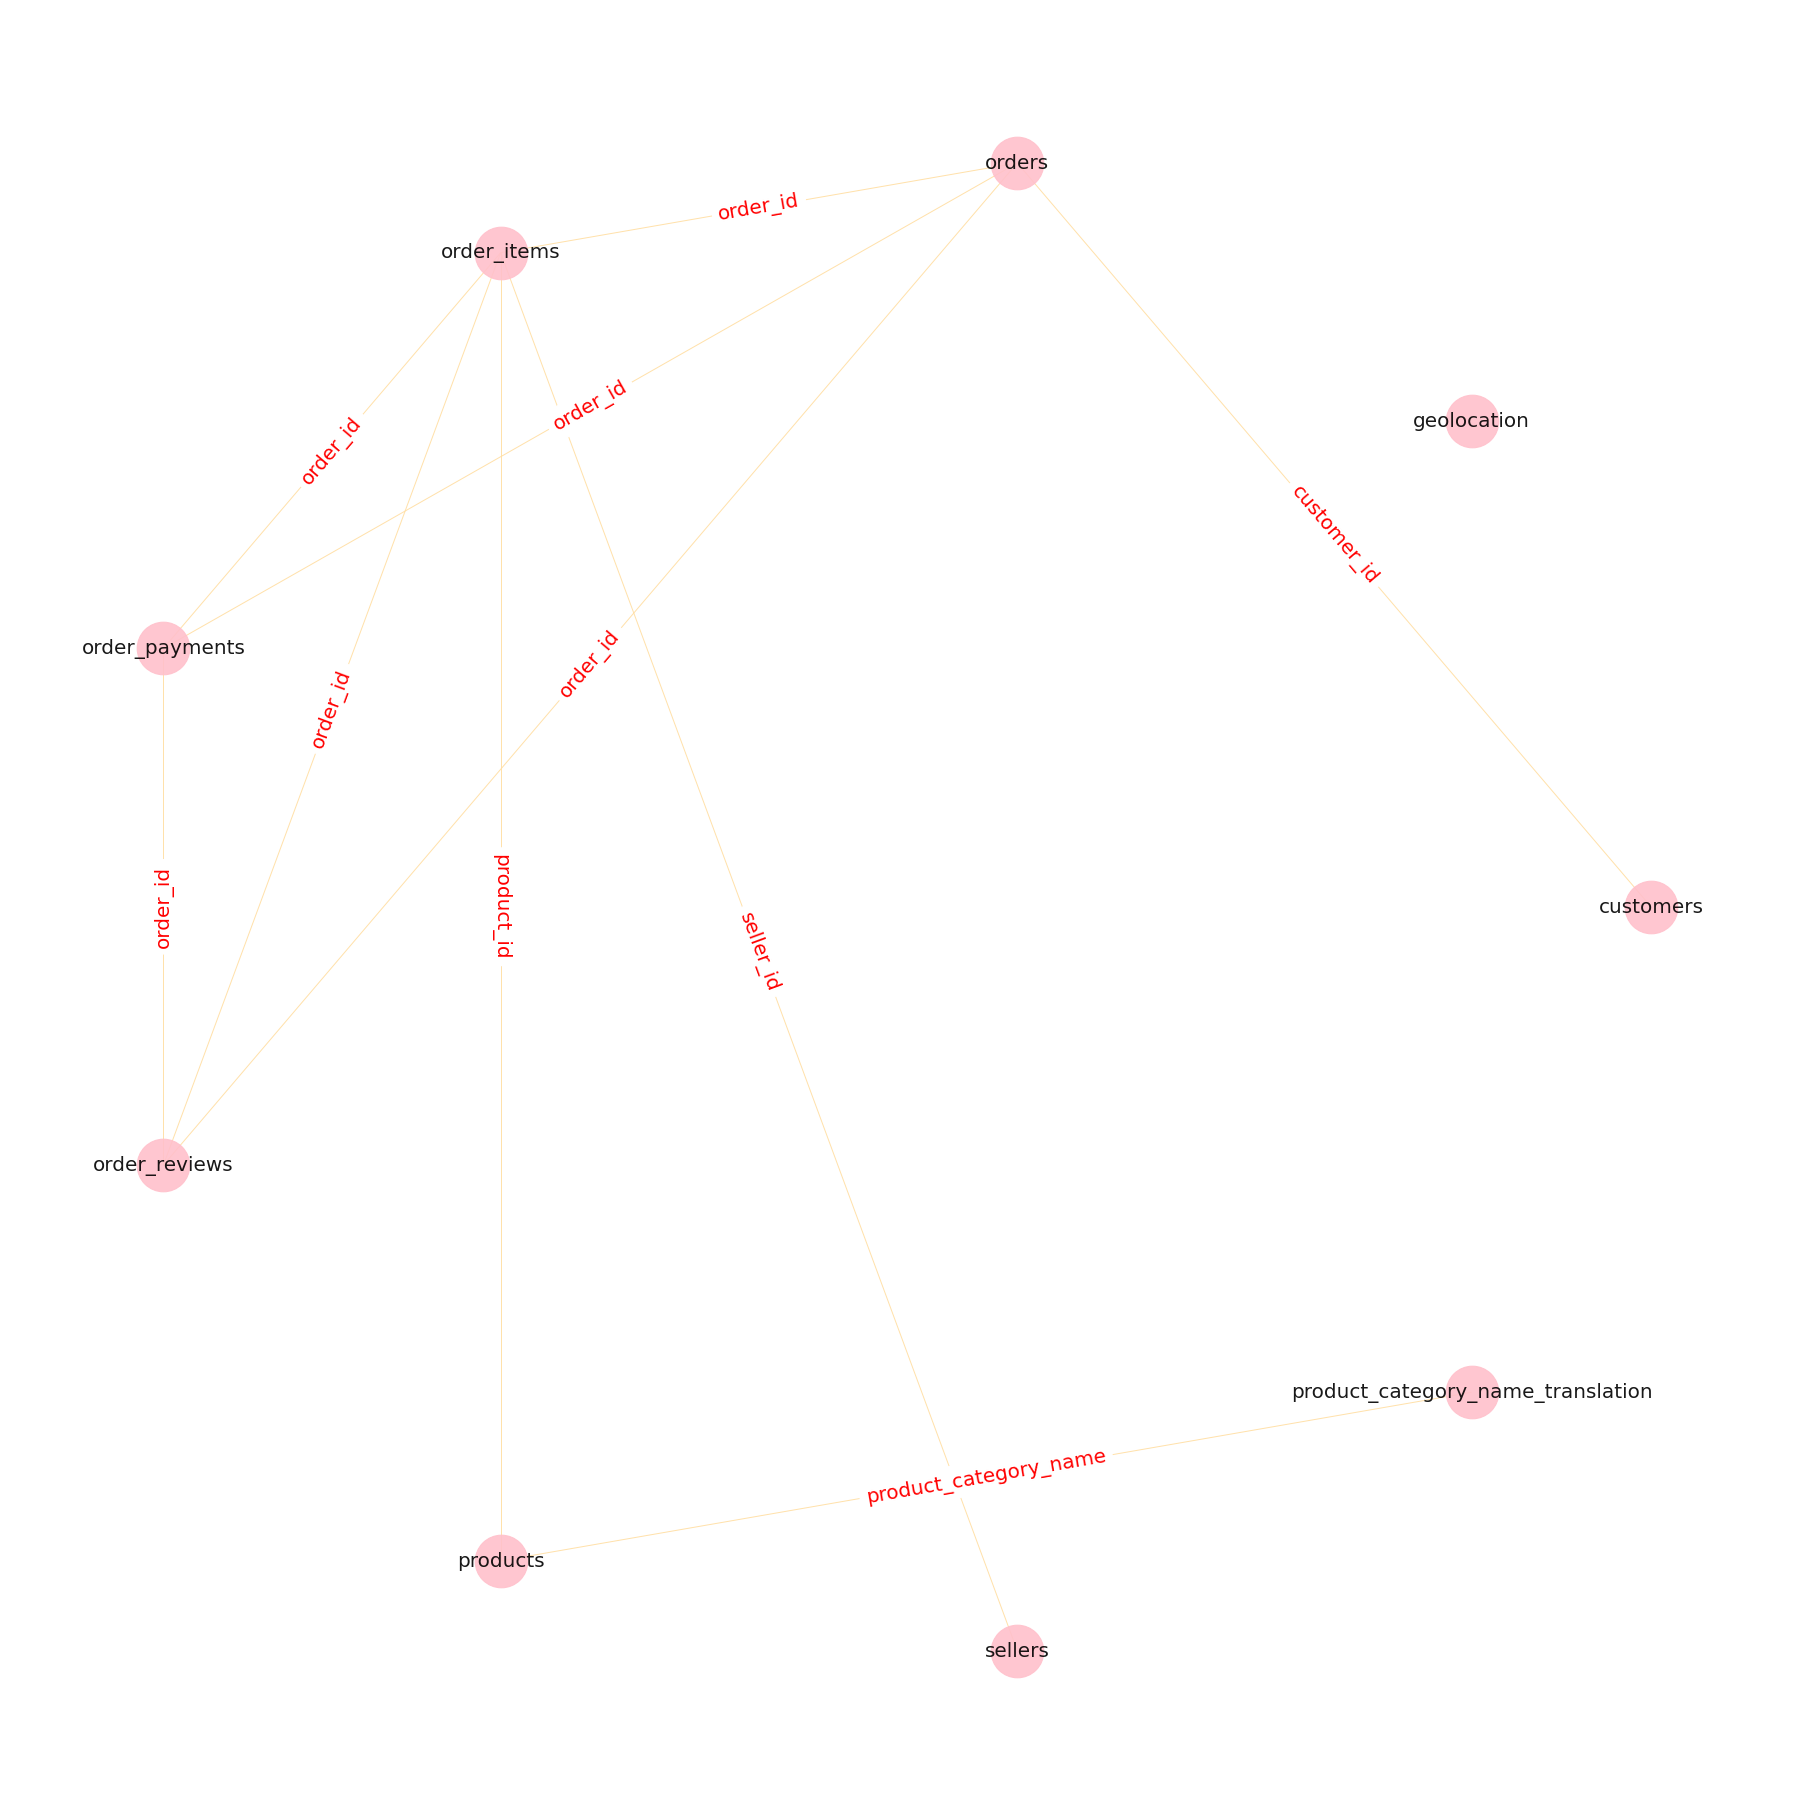

In [11]:
commons, G = display_network(STR_DATASETS)

### What about Geolocation?

In [12]:
from IPython import display

SIMILARS = {
    'Geolocation' : geolocation,
    'Sellers' : sellers,
    'Customers' : customers,
}

for key, value in SIMILARS.items():
    print(f"{bcolors.OKBLUE}{key}{bcolors.ENDC}")
    for index in list(value.columns):
        print(f"   • {index}")

Geolocation
   • geolocation_zip_code_prefix
   • geolocation_lat
   • geolocation_lng
   • geolocation_city
   • geolocation_state
Sellers
   • seller_id
   • seller_zip_code_prefix
   • seller_city
   • seller_state
Customers
   • customer_id
   • customer_unique_id
   • customer_zip_code_prefix
   • customer_city
   • customer_state


In [13]:
for key, value in SIMILARS.items():
    print(f"{bcolors.OKBLUE}{key}{bcolors.ENDC}")
    display.display(value.head(3))

Geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


Sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


Customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


As we can see, zip_code_prefix is common for those three database. We'll rename those variables to be the same.

In [14]:
for dataset in STR_DATASETS:
    name = dataset if dataset[-1] != 's' else dataset[:-1]
    globals()[dataset].rename(
        columns={f'{name}_zip_code_prefix': 'zip_code_prefix'}, inplace=True)

So, now we can update the network.

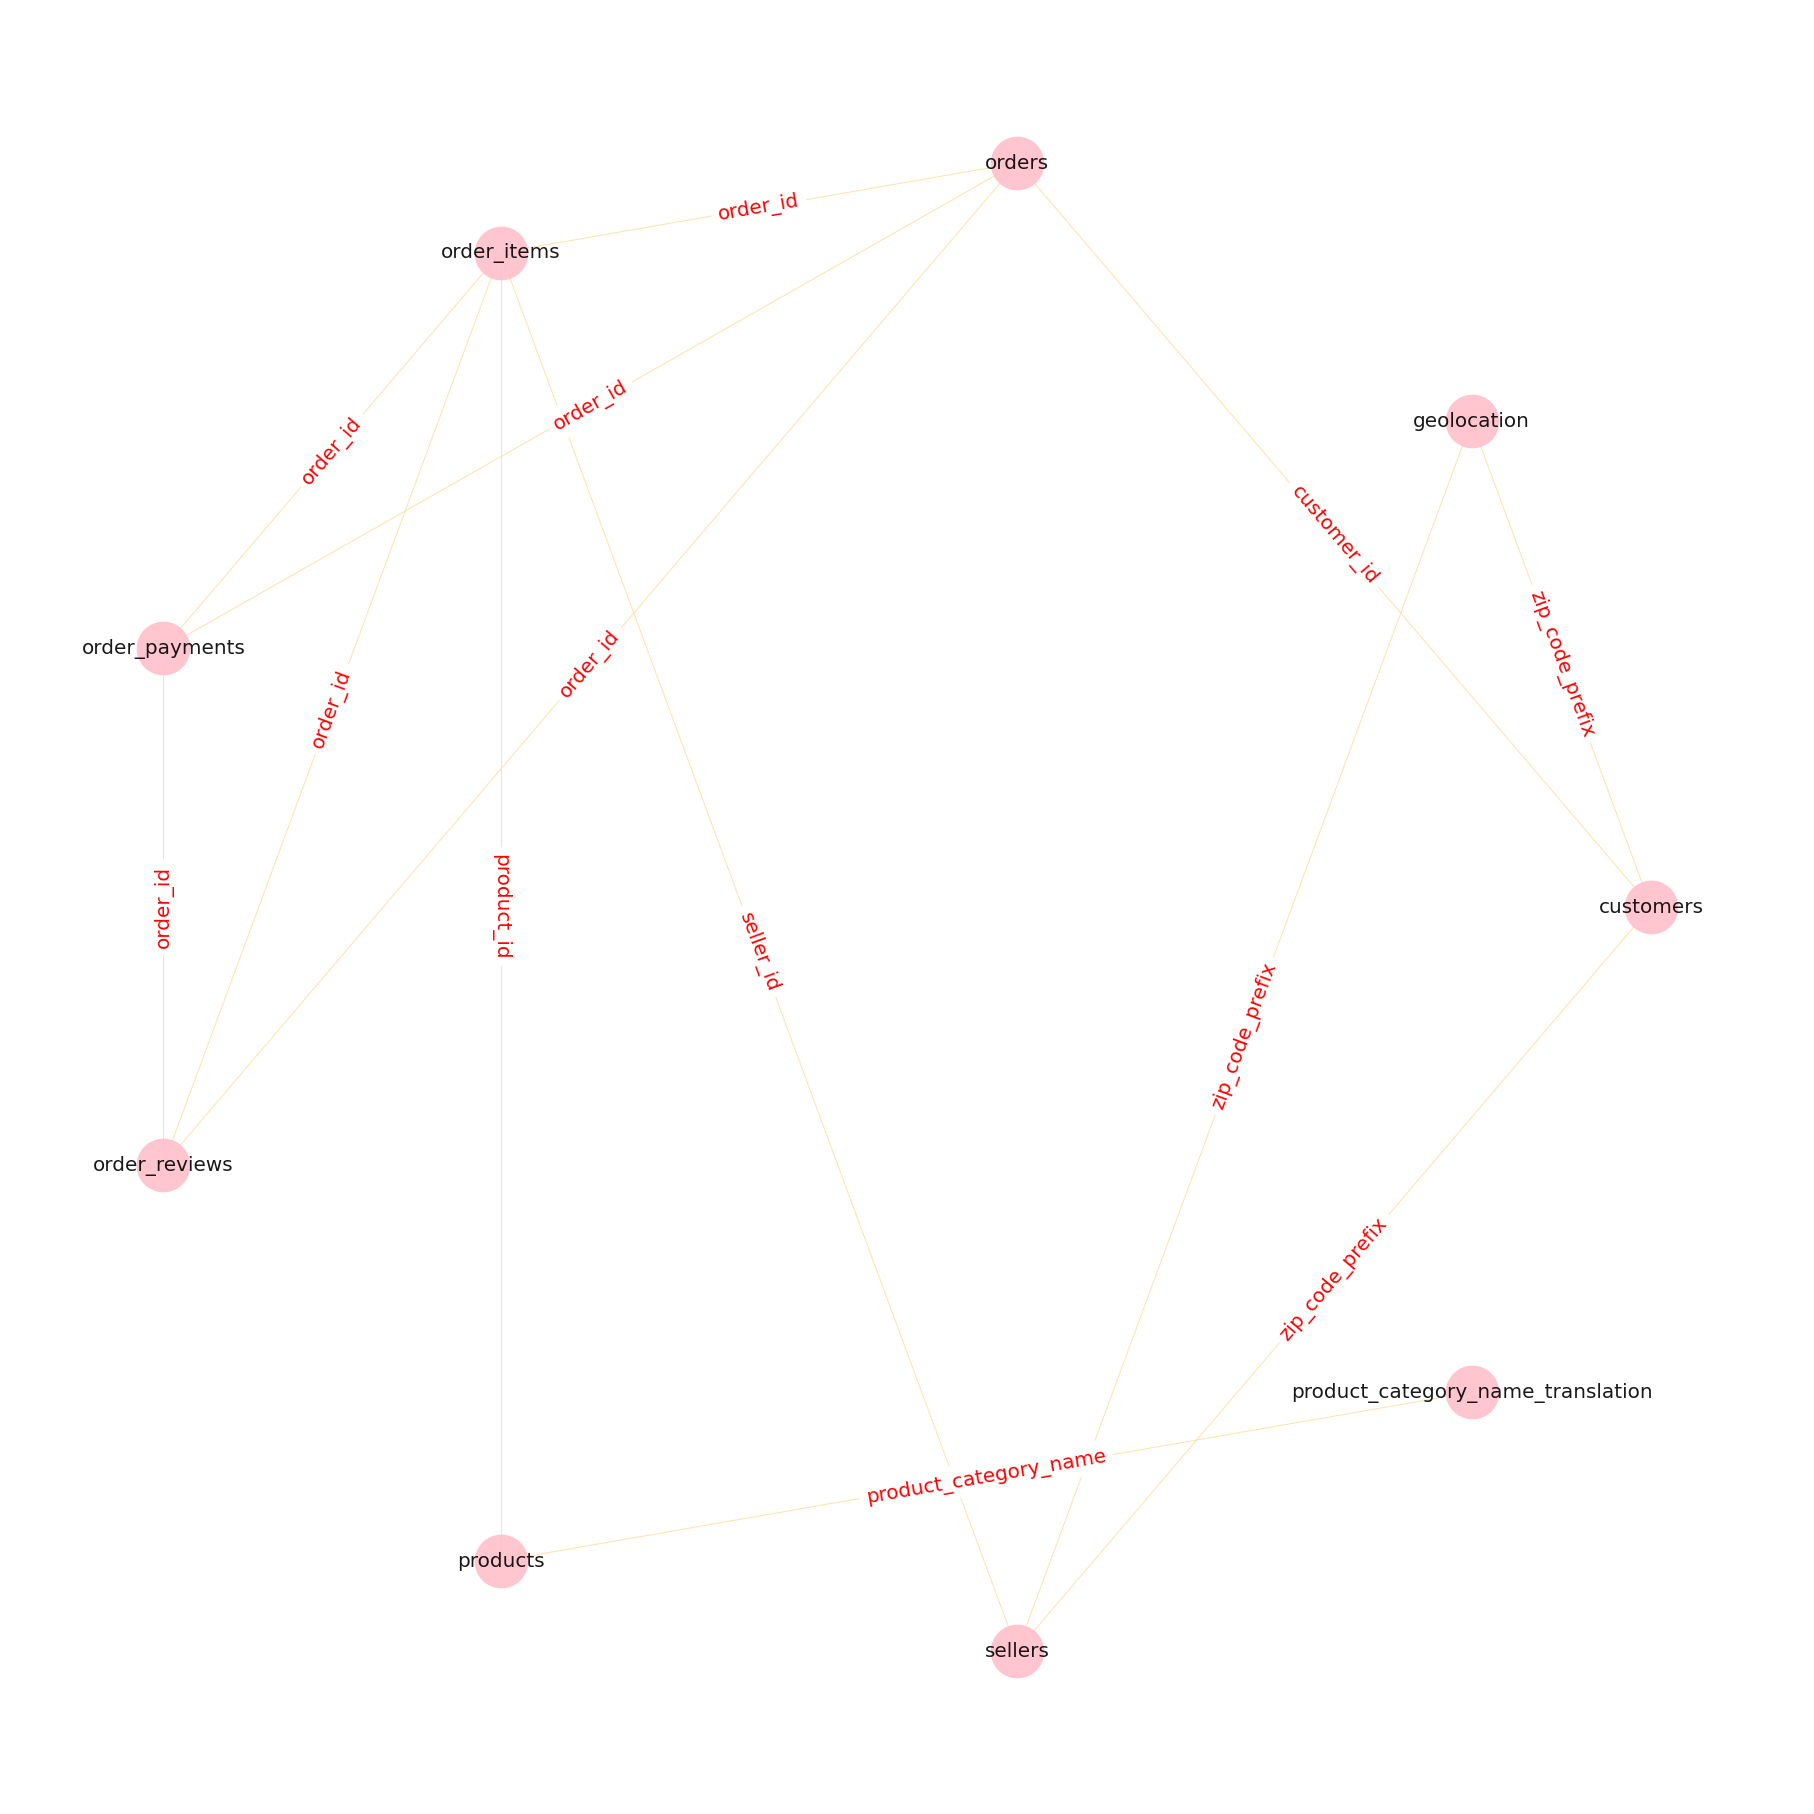

In [15]:
commons, G = display_network(STR_DATASETS)

## Missing values

In [16]:
for dataset in STR_DATASETS:
    print(f"{bcolors.OKBLUE}{dataset} - {bcolors.ENDC}{bcolors.OKBLUE}{bcolors.BOLD}{'{:_}'.format(eval(dataset).shape[0])} samples{bcolors.ENDC}")
    display.display(eval(dataset).isna().sum())

customers - 99_441 samples


customer_id           0
customer_unique_id    0
zip_code_prefix       0
customer_city         0
customer_state        0
dtype: int64

geolocation - 1_000_163 samples


zip_code_prefix      0
geolocation_lat      0
geolocation_lng      0
geolocation_city     0
geolocation_state    0
dtype: int64

orders - 99_441 samples


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

order_items - 112_650 samples


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

order_payments - 103_886 samples


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

order_reviews - 99_224 samples


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

products - 32_951 samples


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

sellers - 3_095 samples


seller_id          0
zip_code_prefix    0
seller_city        0
seller_state       0
dtype: int64

product_category_name_translation - 71 samples


product_category_name            0
product_category_name_english    0
dtype: int64

In [17]:
# Diagramm venn 
# order_approved_at                 160
# order_delivered_carrier_date     1783
# order_delivered_customer_date    2965

## Cleaning

In [18]:
for dataset in STR_DATASETS:
    print(f"{bcolors.OKBLUE}{dataset} - {bcolors.ENDC}{bcolors.OKBLUE}{bcolors.BOLD}{'{:_}'.format(eval(dataset).shape[0])} samples{bcolors.ENDC}")
    display.display(eval(dataset).head(5))

customers - 99_441 samples


,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


geolocation - 1_000_163 samples


,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


orders - 99_441 samples


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


order_items - 112_650 samples


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


order_payments - 103_886 samples


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


order_reviews - 99_224 samples


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


products - 32_951 samples


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


sellers - 3_095 samples


,seller_id,zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


product_category_name_translation - 71 samples


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [19]:
list(geolocation['geolocation_city'].unique())

['sao paulo',
 'são paulo',
 'sao bernardo do campo',
 'jundiaí',
 'taboão da serra',
 'sãopaulo',
 'sp',
 'sa£o paulo',
 'sao jose dos campos',
 'osasco',
 'carapicuíba',
 'carapicuiba',
 'barueri',
 'santana de parnaiba',
 'pirapora do bom jesus',
 'santana de parnaíba',
 'jandira',
 'itapevi',
 'cotia',
 'taboao da serra',
 'vargem grande paulista',
 'embu das artes',
 'itapecerica da serra',
 'embu',
 'são lourenço da serra',
 'sao lourenco da serra',
 'embu-guacu',
 'embu-guaçu',
 'embu guaçu',
 'juquitiba',
 'embu guacu',
 'embuguacu',
 'guarulhos',
 'adamantina',
 'guarulhos-sp',
 'aruja',
 'arujá',
 'santa isabel',
 'mairipora',
 'mairiporã',
 'cajamar',
 'caieiras',
 'jordanesia',
 'polvilho',
 'mauá',
 'jordanésia',
 'franco da rocha',
 'francisco morato',
 'poa',
 'itaquaquecetuba',
 'ferraz de vasconcelos',
 'poá',
 'suzano',
 'mogi das cruzes',
 'mogidascruzes',
 'salesopolis',
 'biritiba-mirim',
 'guararema',
 'salesópolis',
 'biritiba mirim',
 'santo andre',
 'santo andr

The geolocation database has some issues. It might be a database used by Olist to deliver the products but cities contains a lot of duplicates. 
It could cause some problems for the transporter at this point.

### A solution : Reverse-geocoder (Offline)

In [20]:
import reverse_geocoder as rg


def get_cities_offline(all_coords):
    """
    
    Args:
        - all_coords(tuple) : (lat, long), (lat, long), ... for every city to guess
    """
    list_cities = rg.search(all_coords)
    cities = list()
    for city in list_cities:
        cities.append(city['name'].lower())
    return cities  


tuple_coords = tuple(zip(*map(geolocation.get, ['geolocation_lat', 'geolocation_lng'])))
geolocation['geolocation_city'] = get_cities_offline(tuple_coords)

Loading formatted geocoded file...


In [21]:
display.display(list(geolocation['geolocation_city'].unique()))

['sao paulo',
 'guarulhos',
 'diadema',
 'taboao da serra',
 'osasco',
 'embu guacu',
 'sao caetano do sul',
 'caieiras',
 'itaquaquecetuba',
 'ferraz de vasconcelos',
 'maua',
 'mairipora',
 'itapecerica da serra',
 'varzea paulista',
 'carapicuiba',
 'cajamar',
 'sao jose dos campos',
 'jandira',
 'barueri',
 'cotia',
 'itapevi',
 'santana de parnaiba',
 'pirapora do bom jesus',
 'vargem grande paulista',
 'itapeva',
 'embu',
 'sao lourenco da serra',
 'juquitiba',
 'aruja',
 'santa isabel',
 'franco da rocha',
 'francisco morato',
 'campinas',
 'franca',
 'poa',
 'suzano',
 'ribeirao pires',
 'rio grande da serra',
 'mogi das cruzes',
 'guararema',
 'biritiba mirim',
 'santa branca',
 'santo andre',
 'sao bernardo do campo',
 'cubatao',
 'santos',
 'sao vicente',
 'guaruja',
 'bertioga',
 'caruaru',
 'ipero',
 'praia grande',
 'sao sebastiao',
 'ubatuba',
 'ilhabela',
 'caraguatatuba',
 'paraty',
 'mongagua',
 'itanhaem',
 'peruibe',
 'miracatu',
 'juquia',
 'pariquera acu',
 'cajat

In [22]:
for dataset in STR_DATASETS[1:2]:
    print(f"{bcolors.OKBLUE}{dataset}{bcolors.ENDC}")
    display.display(eval(dataset).head(10))

geolocation


,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,sao paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [23]:
# Mean lat/long for same zip code

geolocation = geolocation.groupby(
    ['zip_code_prefix', 'geolocation_city', 'geolocation_state']
)[['geolocation_lat', 'geolocation_lng']].median().reset_index()
geolocation

,zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,1001,sao paulo,SP,-23.550381,-46.634027
1,1002,sao paulo,SP,-23.548551,-46.635072
2,1003,sao paulo,SP,-23.548977,-46.635313
3,1004,sao paulo,SP,-23.549535,-46.634771
4,1005,sao paulo,SP,-23.549612,-46.636532
...,...,...,...,...,...
23821,99970,tapejara,RS,-28.343273,-51.873734
23822,99980,lagoa vermelha,RS,-28.403849,-51.810470
23823,99980,marau,RS,-28.387842,-51.846890
23824,99980,tapejara,RS,-28.386408,-51.844876


In [24]:
# Transform cities for sellers & customers (with zip code)  

zip_to_city = geolocation[
    ['zip_code_prefix', 'geolocation_city']
].set_index('zip_code_prefix').to_dict()['geolocation_city']
    
sellers = sellers.assign(
    seller_city=sellers.zip_code_prefix.map(zip_to_city).fillna(sellers.seller_city))
customers = customers.assign(
    customer_city=customers.zip_code_prefix.map(zip_to_city).fillna(customers.customer_city))

In [25]:
display.display(list(sellers['seller_city'].unique()))

['campinas',
 'mogi-gaucu',
 'rio de janeiro',
 'diadema',
 'braganca paulista',
 'garanhuns',
 'penapolis',
 'sao paulo',
 'curitiba',
 'anapolis',
 'itirapina',
 'taboao da serra',
 'tubarao',
 'lauro de freitas',
 'imbituba',
 'brasilia',
 'santa cruz cabralia',
 'osasco',
 'guaruja',
 'tabatinga',
 'salto',
 'tres de maio',
 'belo horizonte',
 'arapongas',
 'sao bernardo do campo',
 'laranjal paulista',
 'guarulhos',
 'camanducaia',
 'tupa',
 'itaquaquecetuba',
 'sao jose dos pinhais',
 'sao caetano do sul',
 'orleans',
 'florianopolis',
 'piracicaba',
 'porto alegre',
 'pouso alegre',
 'valinhos',
 'joinville',
 'santos',
 'saquarema',
 'penha',
 'petropolis',
 'rolante',
 'ponta grossa',
 'santana de parnaiba',
 'sao carlos',
 'ibitinga',
 'caxias do sul',
 'araguari',
 'ribeirao das neves',
 'jaragua do sul',
 'lages',
 'bento goncalves',
 'catanduva',
 'ribeirao pires',
 'jaboticabal',
 'assis',
 'itapecerica da serra',
 'rio do sul',
 'sorocaba',
 'sao joao de meriti',
 'prado

In [26]:
display.display(list(customers['customer_city'].unique()))

['franca',
 'sao bernardo do campo',
 'sao paulo',
 'mogi das cruzes',
 'indaiatuba',
 'schroeder',
 'timoteo',
 'sao jose dos pinhais',
 'ribeirao das neves',
 'montes claros',
 'rio de janeiro',
 'lencois paulista',
 'taboao da serra',
 'caxias do sul',
 'piracicaba',
 'itaquaquecetuba',
 'tucurui',
 'trindade',
 'goiania',
 'pinhais',
 'guarulhos',
 'sao caetano do sul',
 'cachoeiro de itapemirim',
 'sao jose dos campos',
 'sao roque',
 'camacari',
 'resende',
 'sumare',
 'novo hamburgo',
 'sao luis',
 'palhoca',
 'aruja',
 'rio piracicaba',
 'ribeirao preto',
 'belo horizonte',
 'ituiutaba',
 'taquarituba',
 'osasco',
 'barrinha',
 'sao joao de meriti',
 'paraty',
 'dourados',
 'cascavel',
 'fortaleza',
 'brasilia',
 'pelotas',
 'porto alegre',
 'salto',
 'varzea paulista',
 'cacapava',
 'sao vicente',
 'uberlandia',
 'botelhos',
 'sao goncalo',
 'araucaria',
 'praia grande',
 'nova iguacu',
 'areia branca',
 'campos',
 'sao carlos',
 'itajuba',
 'cruz das almas',
 'vassouras',
 'f

## How does it work?

## Map

In [27]:
def get_coords_from_zip(zip_code):
    """
    Args:
        - zip_code('str'): zip_code_prefix same that the geolocation's zip
        
    Return:
        [latitude(float), longitude(float)]
    """
    coords = list(geolocation.loc[geolocation['zip_code_prefix'] == zip_code,
                    ['geolocation_lat', 'geolocation_lng']].values[0])
    return coords

if DEBUG == 0:

    import folium
    from folium.plugins import MarkerCluster

    START_POINT = [-25, -48]
    zoom_start = 5

    m = folium.Map(location=START_POINT, zoom_start=zoom_start)
    cluster = MarkerCluster().add_to(m)

    for index, row in customers.iterrows():
        try:
            coords = list(get_coords_from_zip(row['zip_code_prefix']))
        except IndexError:
            pass
        folium.Marker(coords).add_to(cluster)

In [28]:
# Show the map
try:
    m
except NameError:
    # in debug mode
    pass

- volume * distance * weight // freight price
- price // freight price
- distance // time_delivery
- number_command // city (heatmap)
- top product type
- 

In [29]:
# Now that states are fixed. We can distinguish the zip_codes for every dataset.

for dataset in STR_DATASETS:
    name = dataset if dataset[-1] != 's' else dataset[:-1]
    globals()[dataset].rename(
        columns={'zip_code_prefix': f'{name}_zip_code_prefix'}, inplace=True)

## Fusions

In [30]:
# Translation on products categories

products = pd.merge(
    products,
    product_category_name_translation,
    how='left',
    on='product_category_name')

# creation volume and drop sizes of products.
products['product_volume_m3'] = ((products['product_width_cm']/100)*
                      (products['product_length_cm']/100)*
                      (products['product_height_cm']/100))

# Deletion of variables
PRODUCTS_VAR_TO_DEL = [
    'product_width_cm',
    'product_length_cm',
    'product_height_cm',
    'product_category_name',
]

products.drop(PRODUCTS_VAR_TO_DEL, axis=1, inplace=True)

# Rename category's variable

products = products.rename(columns={'product_category_name_english': 'product_category_name'})


In [31]:
products.head(5)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_category_name,product_volume_m3
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,perfumery,0.002240
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,art,0.010800
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,sports_leisure,0.002430
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,baby,0.002704
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,housewares,0.004420


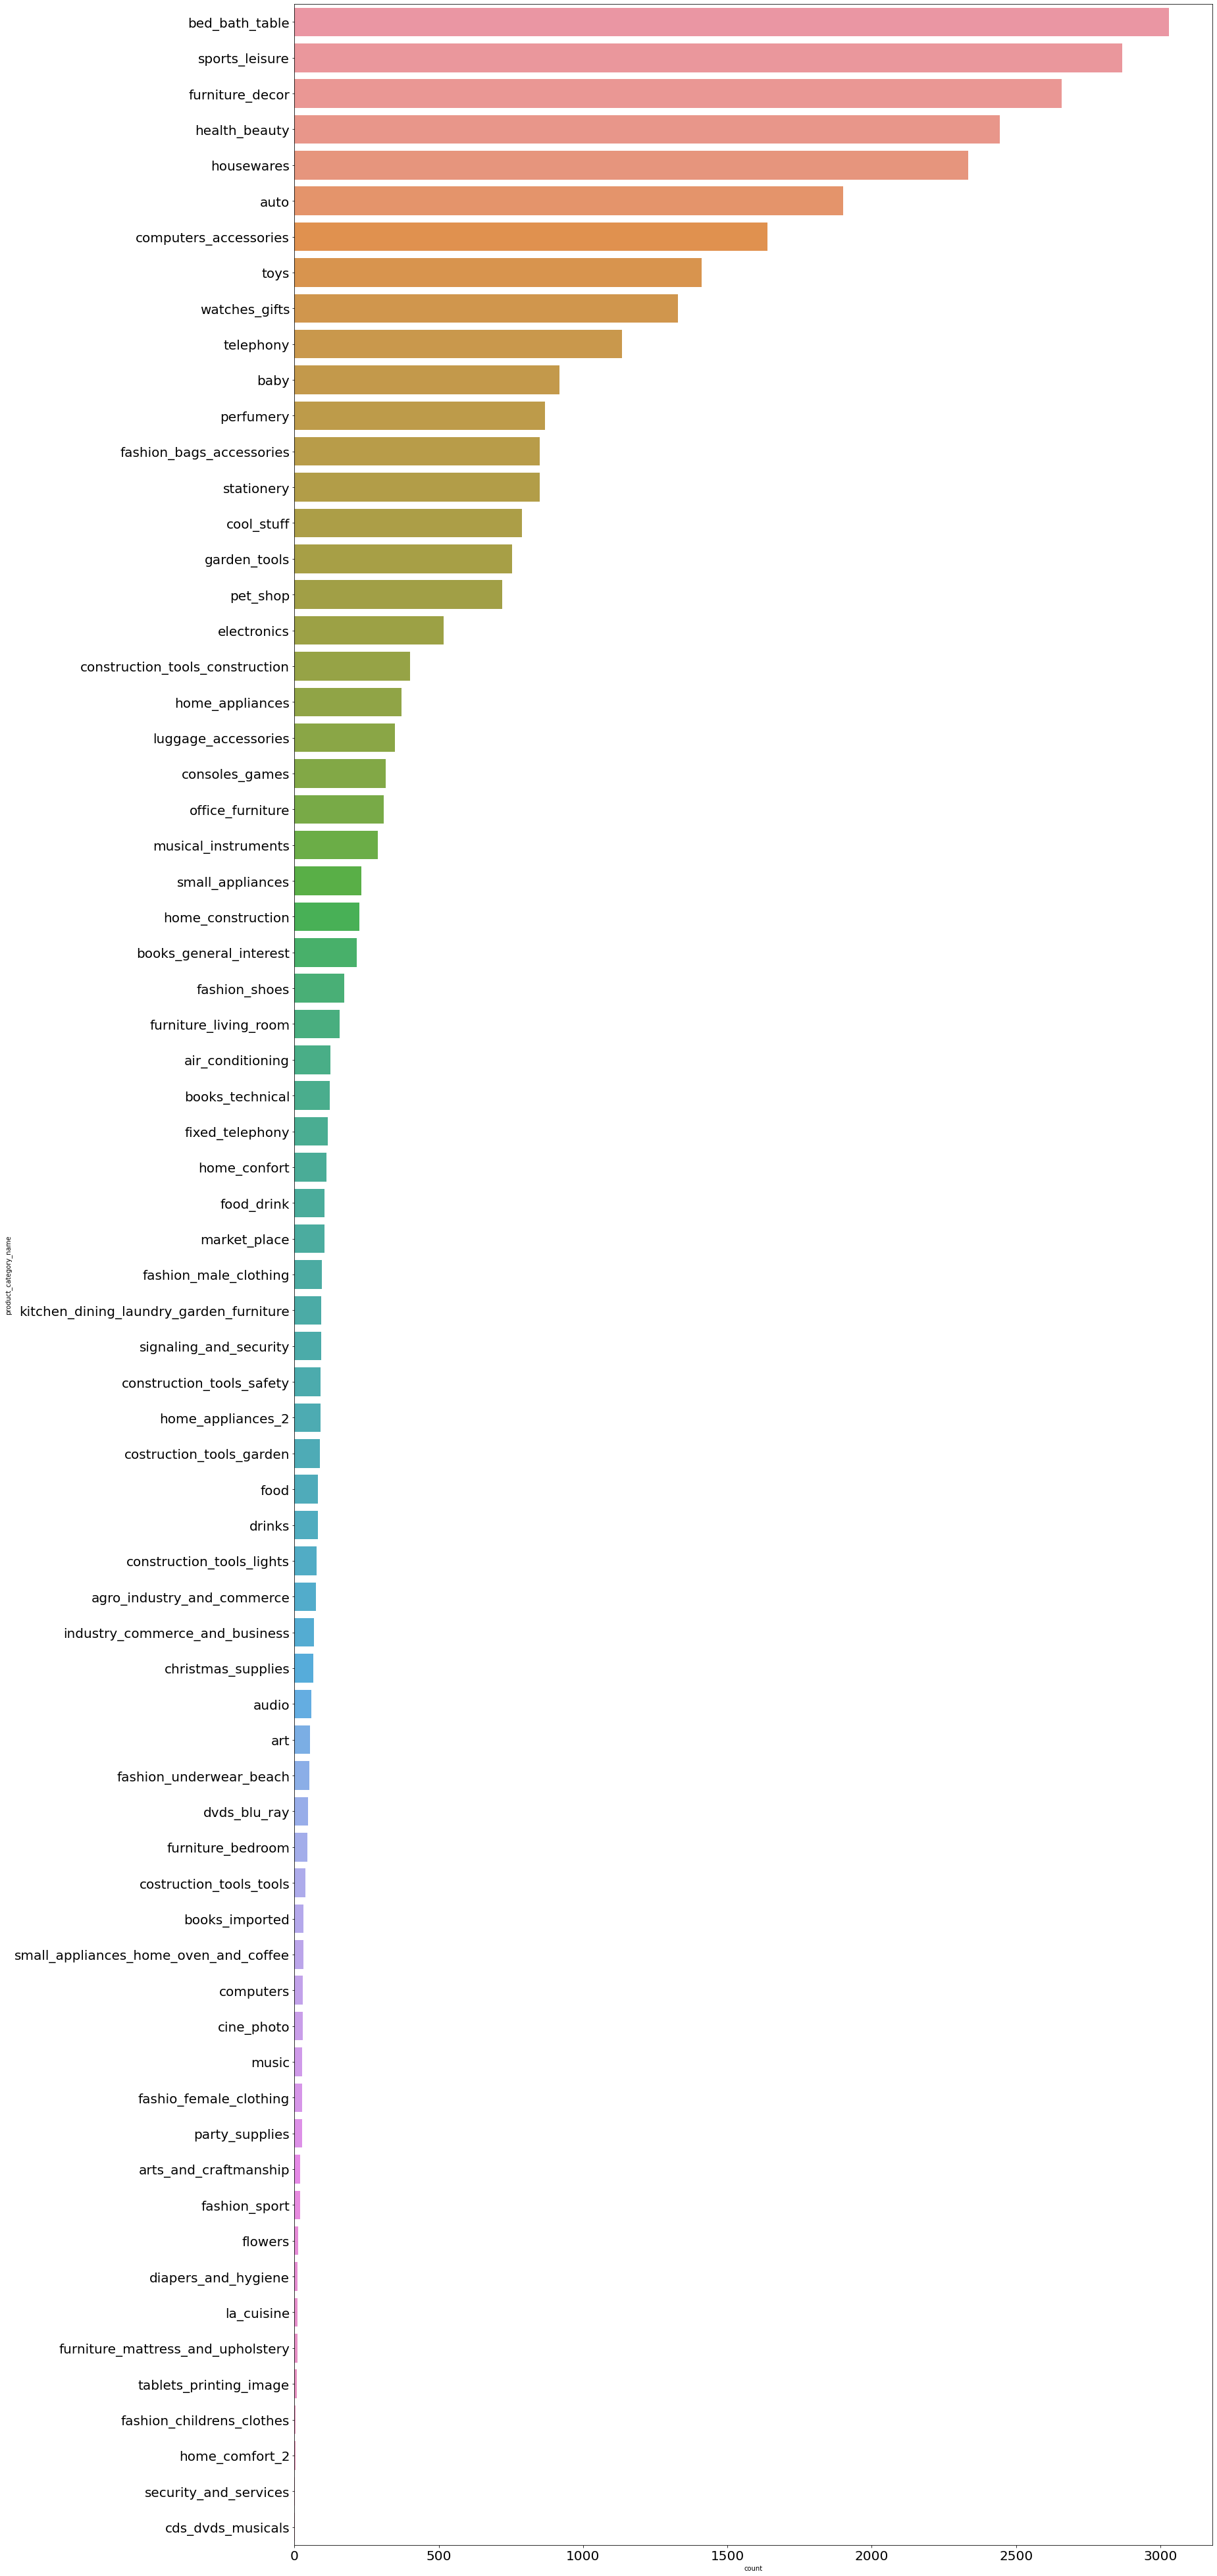

In [32]:
fig, ax = plt.subplots(figsize=(25,(products['product_category_name'].value_counts().shape[0])))
plt.yticks(size=20)
plt.xticks(size=20)
sns.countplot(data=products,
              y='product_category_name',
              order=products['product_category_name'].value_counts().index)
plt.show()

In [33]:
# Translation on products categories

order_items = pd.merge(
    order_items,
    orders,
    how='left',
    on='order_id')

order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [34]:
# date format : %year-%month-%day %hour:%minutes:%secondes
# FORMAT ISO 8601 
# YYYY-MM-DDTHH:MM:SS
# T : separator

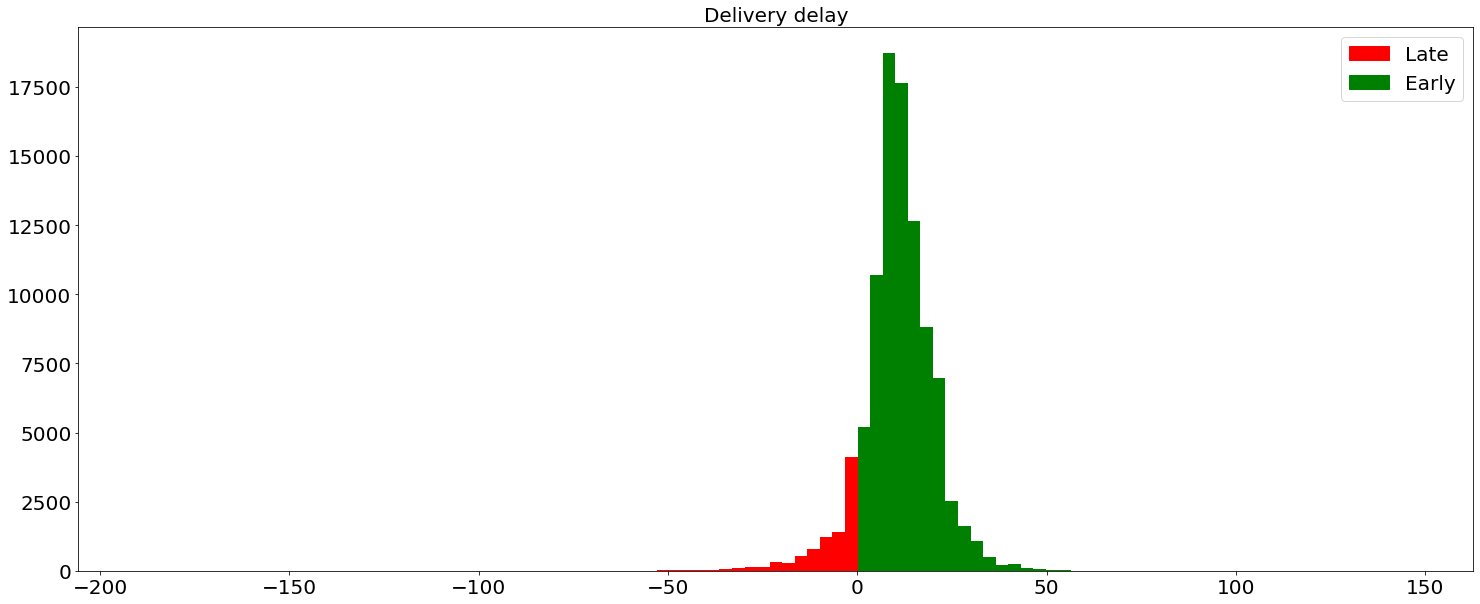

In [35]:
# delay delivery

delivery = pd.DataFrame()
delivery['days'] = (
    pd.to_datetime(orders['order_estimated_delivery_date'])
    -
    pd.to_datetime(orders['order_delivered_customer_date'])
    ).dt.days

fig, ax = plt.subplots(figsize=(25, 10))
plt.yticks(size=20)
plt.xticks(size=20)
n, bins, patches = plt.hist(delivery['days'], 101)

for c, p in zip(bins, patches):
    if c >= 0:
        plt.setp(p, 'facecolor', 'green')
    else:
        plt.setp(p, 'facecolor', 'red')

red_patch = mpl.patches.Patch(color='red', label='Late')
green_patch = mpl.patches.Patch(color='green', label='Early')
ax.legend(handles=[red_patch, green_patch], prop={'size':20})
plt.title('Delivery delay', fontsize=20)
plt.show()

In [36]:

order_items = pd.merge(
    order_items,
    order_payments,
    how='left',
    on='order_id')

order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,1.0,credit_card,3.0,218.04


In [37]:
order_items = pd.merge(
    order_items,
    order_reviews,
    how='left',
    on='order_id')

# comment title -> True False if present
# comment message -> True False if present

def is_not_empty(msg):
    return True if type(msg) is str else False

order_items['review_comment_title'] = order_items['review_comment_title'].apply(is_not_empty)
order_items['review_comment_message'] = order_items['review_comment_message'].apply(is_not_empty)

order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,False,True,2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,False,False,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,False,True,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,False,False,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,False,True,2017-03-02 00:00:00,2017-03-03 10:54:59


In [38]:
order_items = pd.merge(
    order_items,
    sellers,
    how='left',
    on='seller_id')

order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,False,True,2017-09-21 00:00:00,2017-09-22 10:57:03,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,259.83,7b07bacd811c4117b742569b04ce3580,4.0,False,False,2017-05-13 00:00:00,2017-05-15 11:34:13,3471,sao caetano do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,False,True,2018-01-23 00:00:00,2018-01-23 16:06:31,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,25.78,f4028d019cb58564807486a6aaf33817,4.0,False,False,2018-08-15 00:00:00,2018-08-15 16:39:01,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,218.04,940144190dcba6351888cafa43f3a3a5,5.0,False,True,2017-03-02 00:00:00,2017-03-03 10:54:59,87900,loanda,PR


In [39]:
order_items = pd.merge(
    order_items,
    customers,
    how='left',
    on='customer_id')

order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,True,2017-09-21 00:00:00,2017-09-22 10:57:03,27277,volta redonda,SP,871766c5855e863f6eccc05f988b23cb,28013,campos,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,False,2017-05-13 00:00:00,2017-05-15 11:34:13,3471,sao caetano do sul,SP,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,True,2018-01-23 00:00:00,2018-01-23 16:06:31,37564,borda da mata,MG,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,False,2018-08-15 00:00:00,2018-08-15 16:39:01,14403,franca,SP,af861d436cfc08b2c2ddefd0ba074622,12952,jarinu,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,True,2017-03-02 00:00:00,2017-03-03 10:54:59,87900,loanda,PR,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [40]:
order_items = pd.merge(
    order_items,
    products,
    how='left',
    on='product_id')

order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_category_name,product_volume_m3
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,871766c5855e863f6eccc05f988b23cb,28013,campos,RJ,58.0,598.0,4.0,650.0,cool_stuff,0.003528
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,56.0,239.0,2.0,30000.0,pet_shop,0.060000
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,59.0,695.0,2.0,3050.0,furniture_decor,0.014157
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,af861d436cfc08b2c2ddefd0ba074622,12952,jarinu,SP,42.0,480.0,1.0,200.0,perfumery,0.002400
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,59.0,409.0,1.0,3750.0,garden_tools,0.042000


In [41]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display.display(order_items)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_category_name,product_volume_m3
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,False,True,2017-09-21 00:00:00,2017-09-22 10:57:03,27277,volta redonda,SP,871766c5855e863f6eccc05f988b23cb,28013,campos,RJ,58.0,598.0,4.0,650.0,cool_stuff,0.003528
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,False,False,2017-05-13 00:00:00,2017-05-15 11:34:13,3471,sao caetano do sul,SP,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,56.0,239.0,2.0,30000.0,pet_shop,0.060000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118308,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,1.0,credit_card,3.0,64.71,fba117c9ac40d41ca7be54741f471303,5.0,False,True,2017-08-17 00:00:00,2017-08-18 12:24:05,4733,diadema,SP,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,56.0,1306.0,1.0,100.0,computers_accessories,0.008000
118309,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79,96d649da0cc4ff33bb408b199d4c7dcf,delivered,2018-06-09 17:00:18,2018-06-09 17:10:13,2018-06-11 14:11:00,2018-06-14 17:56:26,2018-06-28 00:00:00,1.0,credit_card,1.0,55.79,b2700869a37f1aafc9dda829dc2f9027,5.0,False,False,2018-06-15 00:00:00,2018-06-17 21:27:09,14940,ibitinga,SP,cd76a00d8e3ca5e6ab9ed9ecb6667ac4,18605,botucatu,SP,47.0,511.0,1.0,600.0,bed_bath_table,0.001710


In [42]:
# delivered or not

order_items['order_status'].unique()

array(['delivered', 'shipped', 'canceled', 'invoiced', 'processing',
       'approved', 'unavailable'], dtype=object)

In [43]:
order_items['order_status'].value_counts()

delivered      115723
shipped          1255
canceled          570
invoiced          376
processing        376
unavailable         7
approved            3
Name: order_status, dtype: int64

In [44]:
def delivered_or_not(status):
    """
    Args:
        -status(str): order status
    Returns:
        True if status is delivered, else False
    """
    return status == 'delivered'

order_items['order_status'] = order_items['order_status'].apply(delivered_or_not)

In [45]:
# Distance between seller and customer
import geopy.distance

def get_coords_from_zip(zip_code):
    """
    Args:
        - zip_code('str'): zip_code_prefix same that the geolocation's zip
        
    Return:
        [latitude(float), longitude(float)]
    """
    try:
        coords = list(geolocation.loc[geolocation['geolocation_zip_code_prefix'] == zip_code,
                        ['geolocation_lat', 'geolocation_lng']].values[0])
    except IndexError:
        zip_code = 1001
        coords = list(geolocation.loc[geolocation['geolocation_zip_code_prefix'] == zip_code,
                        ['geolocation_lat', 'geolocation_lng']].values[0])
    return coords

def distance_from_zip_codes(zip1, zip2):
    """
    Args:
        - zip_codes(list): 2 zip code
    Return:
        The distance between two cities (in kilometers)
    """
    coords_1 = tuple(get_coords_from_zip(zip1))
    coords_2 = tuple(get_coords_from_zip(zip2))

    distance = geopy.distance.distance(coords_1, coords_2).km
    return distance


order_items['order_delivery_distance'] = order_items.apply(
    lambda x: distance_from_zip_codes(
        x['seller_zip_code_prefix'],
        x['customer_zip_code_prefix']), axis=1)

In [46]:
# distance stud

In [47]:
# When customers purchase items
def get_month_from_date(date):
    """
    Args:
        - date(str) : 'YYYY-MM-DDTHH:MM:SS' where T is sep (' ')
    Returns:
        the month MM (int)
    """
    return int(date[5:7])
    
order_items['order_month'] = order_items['order_purchase_timestamp'].apply(get_month_from_date)    

In [48]:
# month purchase stud

In [49]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display.display(order_items)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_category_name,product_volume_m3,order_delivery_distance,order_month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,True,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,False,True,2017-09-21 00:00:00,2017-09-22 10:57:03,27277,volta redonda,SP,871766c5855e863f6eccc05f988b23cb,28013,campos,RJ,58.0,598.0,4.0,650.0,cool_stuff,0.003528,301.582449,9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,True,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,False,False,2017-05-13 00:00:00,2017-05-15 11:34:13,3471,sao caetano do sul,SP,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,56.0,239.0,2.0,30000.0,pet_shop,0.060000,68.696763,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118308,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,True,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,1.0,credit_card,3.0,64.71,fba117c9ac40d41ca7be54741f471303,5.0,False,True,2017-08-17 00:00:00,2017-08-18 12:24:05,4733,diadema,SP,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,56.0,1306.0,1.0,100.0,computers_accessories,0.008000,72.383986,8
118309,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79,96d649da0cc4ff33bb408b199d4c7dcf,True,2018-06-09 17:00:18,2018-06-09 17:10:13,2018-06-11 14:11:00,2018-06-14 17:56:26,2018-06-28 00:00:00,1.0,credit_card,1.0,55.79,b2700869a37f1aafc9dda829dc2f9027,5.0,False,False,2018-06-15 00:00:00,2018-06-17 21:27:09,14940,ibitinga,SP,cd76a00d8e3ca5e6ab9ed9ecb6667ac4,18605,botucatu,SP,47.0,511.0,1.0,600.0,bed_bath_table,0.001710,134.418942,6


In [50]:
dataset = order_items.copy()
dataset_ = order_items.copy()

In [51]:
TO_DROP = [
    'order_id',
    'order_item_id',
    'price',
    'freight_value',
    'payment_value',
    'review_score',
    'product_volume_m3',
    'order_delivery_distance',
    'product_id',
    'seller_id',
    'shipping_limit_date',
    'customer_id',
    #'order_status',
    'order_purchase_timestamp',
    'order_month',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'payment_sequential',
    'payment_type',
    'payment_installments',
    'review_id',
    'review_comment_title',
    'review_comment_message',
    'review_creation_date',
    'review_answer_timestamp',
    'seller_zip_code_prefix',
    'seller_city',
    'seller_state',
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_category_name'
]

dataset_.drop(TO_DROP, axis=1, inplace=True)

In [52]:
MODIFICATIONS = {
    'price': 'sum',
    'freight_value': 'sum',
    'payment_value': 'sum',
    'review_score': 'mean',
    'review_comment_message': 'mean',
    'order_delivery_distance': 'mean',
    'product_volume_m3': 'mean',
    'product_weight_g': 'mean',
    'order_id': 'nunique',
    'order_month': 'mean',
    'seller_id': 'nunique',
}

dataset = dataset.groupby("customer_unique_id").agg(MODIFICATIONS)


# Rename
for key, value in MODIFICATIONS.items():
    dataset = dataset.rename(columns={key: f"{value}_{key}"})

dataset = dataset.rename(columns={"nunique_order_id": "number_purchase"})

dataset = pd.merge(
dataset,
dataset_,
how='left',
on='customer_unique_id')

#dataset = dataset.set_index('customer_unique_id')

In [53]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    display.display(dataset)

,customer_unique_id,sum_price,sum_freight_value,sum_payment_value,mean_review_score,mean_review_comment_message,mean_order_delivery_distance,mean_product_volume_m3,mean_product_weight_g,number_purchase,mean_order_month,nunique_seller_id,order_status,customer_zip_code_prefix,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,12.00,141.90,5.0,1.0,110.587602,0.007616,1500.0,1,5.0,1,True,7787,cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,8.29,27.19,4.0,0.0,22.231281,0.005148,375.0,1,5.0,1,True,6053,osasco,SP
2,0000f46a3911fa3c0805444483337064,69.00,17.22,86.22,3.0,0.0,515.396664,0.043750,1500.0,1,3.0,1,True,88115,campinas,SC
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,17.63,43.62,4.0,1.0,2469.433174,0.001045,150.0,1,10.0,1,True,66812,belem,PA
4,0004aac84e0df4da2b147fca70cf8255,180.00,16.89,196.89,5.0,0.0,154.729163,0.000528,6050.0,1,11.0,1,True,18040,sorocaba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,497.42,4134.84,5.0,0.0,1989.601019,0.251625,30000.0,1,6.0,1,True,55250,pesqueira,PE
118306,fffea47cd6d3cc0a88bd621562a9d061,64.89,19.69,84.58,4.0,0.0,1523.826789,0.032076,1720.0,1,12.0,1,True,44054,feira de santana,BA
118307,ffff371b4d645b6ecea244b27531430a,89.90,22.56,112.46,5.0,0.0,1524.820720,0.003315,600.0,1,2.0,1,True,78552,sinop,MT
118308,ffff5962728ec6157033ef9805bacc48,115.00,18.69,133.69,5.0,1.0,638.731884,0.004480,444.0,1,5.0,1,True,29460,bom jesus do itabapoana,ES


In [54]:
# Extract to .csv
dataset.to_csv('dataset.csv', sep='\t')